In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv('D:/')

### Standard Scaler

In [2]:
df = pd.DataFrame({'X1':np.random.normal(0,2,1000),
                   'X2':np.random.normal(5,3,1000),
                   'X3':np.random.normal(-5,5,1000)})

<AxesSubplot:ylabel='Density'>

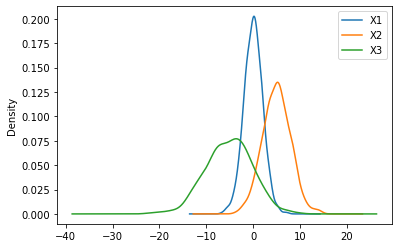

In [3]:
df.plot.kde()

In [4]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

In [5]:
data_tf = standardscaler.fit_transform(df)

<AxesSubplot:ylabel='Density'>

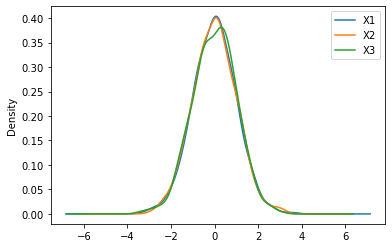

In [10]:
data_tf = pd.DataFrame(data_tf,columns=['X1','X2','X3'])
data_tf.plot.kde()

### MinMax Scaler

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
df = pd.DataFrame({'X1':np.random.chisquare(8,1000),
                   'X2':np.random.beta(8,2,1000)*40,
                   'X3':np.random.normal(50,3,1000)})

<AxesSubplot:ylabel='Density'>

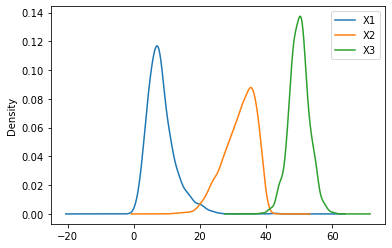

In [16]:
df.plot.kde()

In [18]:
min_max = MinMaxScaler()
df_tf = min_max.fit_transform(df)

In [20]:
df = pd.DataFrame(df_tf,columns={'X1','X2','X3'})

<AxesSubplot:ylabel='Density'>

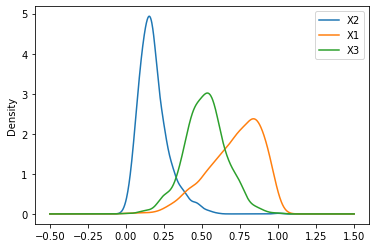

In [21]:
df.plot.kde()

### Robust Scaler

In [22]:
from sklearn.preprocessing import RobustScaler

In [23]:
rb = RobustScaler()

In [25]:
df = pd.DataFrame({'X1':np.concatenate([np.random.normal(20,1,1000),np.random.normal(1,1,25)]),
                   'X2':np.concatenate([np.random.normal(30,1,1000),np.random.normal(50,5,25)])})

<AxesSubplot:ylabel='Density'>

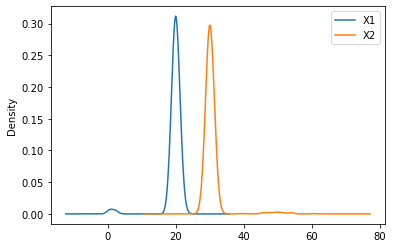

In [26]:
df.plot.kde()

In [27]:
df_tf = rb.fit_transform(df)

<AxesSubplot:ylabel='Density'>

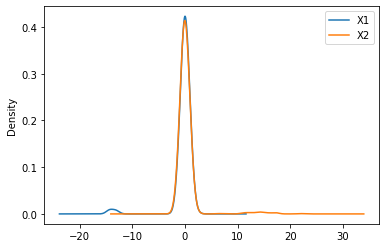

In [29]:
data = pd.DataFrame(df_tf,columns=['X1','X2'])
data.plot.kde()

### Normalizar

In [30]:
from sklearn.preprocessing import Normalizer

In [31]:
normal = Normalizer()

In [32]:
df = pd.DataFrame({'X1':np.random.randint(-100,100,1000).astype(float),
                   'X2':np.random.randint(-80,80,1000).astype(float),
                   'X3':np.random.randint(-150,150,1000).astype(float)})

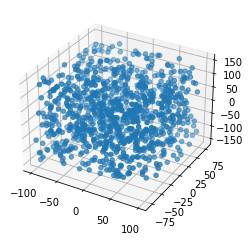

In [37]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.X1,df.X2,df.X3)

In [38]:
df_tf = normal.fit_transform(df)
data = pd.DataFrame(df_tf,columns=['X1','X2','X3'])

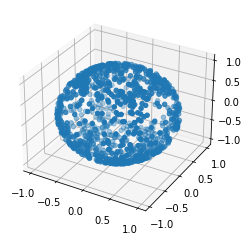

In [39]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data.X1,data.X2,data.X3)

### Encoder

In [41]:
df = pd.DataFrame({'Age':[22,44,54,32,67,55],
                   'Gender':['M','F','M','F','F','M']})

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()
df['Gender_Encoded'] = le.fit_transform(df['Gender'])

In [44]:
df

,Age,Gender,Gender_Encoded
0,22,M,1
1,44,F,0
2,54,M,1
3,32,F,0
4,67,F,0
5,55,M,1


### Imputation

In [45]:
df = pd.DataFrame({'A':[2,3,5,7,np.nan,8,9],
                   'B':[4,2,1,8,np.nan,10,7]})

In [55]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')
df_imp = imp_mean.fit_transform(df)

### Polynomial Features

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
df = pd.DataFrame({'A':[1,2,3,4,5],
                   'B':[5,6,7,8,9]})
df

,A,B
0,1,5
1,2,6
2,3,7
3,4,8
4,5,9


In [60]:
poly = PolynomialFeatures(degree=2)
df_poly = poly.fit_transform(df)

In [62]:
df_poly

array([[ 1.,  1.,  5.,  1.,  5., 25.],
       [ 1.,  2.,  6.,  4., 12., 36.],
       [ 1.,  3.,  7.,  9., 21., 49.],
       [ 1.,  4.,  8., 16., 32., 64.],
       [ 1.,  5.,  9., 25., 45., 81.]])

### CountVectorizer

In [63]:
corpus = [
     'This is the first document awesome food.',
     'This is the second second document.',
     'And the third one the is mission impossible.',
     'Is this the first document?',
]

In [64]:
df = pd.DataFrame({'Text':corpus})

In [67]:
type(df.Text)

pandas.core.series.Series

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

In [70]:
cv = CountVectorizer()
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [71]:
cv.vocabulary_

{'this': 12,
 'is': 6,
 'the': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 9,
 'and': 0,
 'third': 11,
 'one': 8,
 'mission': 7,
 'impossible': 5}

In [72]:
cv = CountVectorizer(stop_words='english')
cv.fit_transform(df.Text).toarray()

array([[1, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 2],
       [0, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0]], dtype=int64)

In [73]:
cv = CountVectorizer(ngram_range=[1,2])
cv.fit_transform(df.Text).toarray()

array([[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2,
        0, 1, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [74]:
cv.vocabulary_

{'this': 28,
 'is': 10,
 'the': 21,
 'first': 6,
 'document': 4,
 'awesome': 2,
 'food': 8,
 'this is': 29,
 'is the': 12,
 'the first': 22,
 'first document': 7,
 'document awesome': 5,
 'awesome food': 3,
 'second': 18,
 'the second': 24,
 'second second': 20,
 'second document': 19,
 'and': 0,
 'third': 26,
 'one': 16,
 'mission': 14,
 'impossible': 9,
 'and the': 1,
 'the third': 25,
 'third one': 27,
 'one the': 17,
 'the is': 23,
 'is mission': 11,
 'mission impossible': 15,
 'is this': 13,
 'this the': 30}

### Hashing Vectorizer

In [75]:
from sklearn.feature_extraction.text import HashingVectorizer

In [79]:
hv = HashingVectorizer(n_features=5)

In [80]:
hv.fit_transform(df.Text).toarray()

array([[ 0.        , -0.37796447,  0.75592895, -0.37796447,  0.37796447],
       [ 0.81649658,  0.        ,  0.40824829, -0.40824829,  0.        ],
       [-0.31622777,  0.        ,  0.31622777, -0.63245553, -0.63245553],
       [ 0.        , -0.57735027,  0.57735027, -0.57735027,  0.        ]])

### Image Processing using skimage

In [81]:
from skimage.io import imread,imshow

In [82]:
image = imread('D:/1.jpg')

In [85]:
image.shape

(1800, 2700, 3)

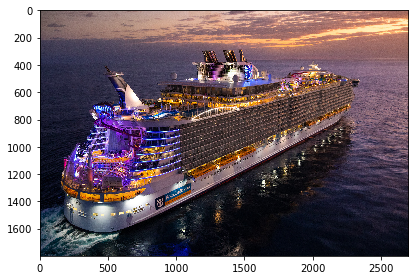

In [86]:
imshow(image)

In [87]:
from skimage.color import rgb2grey

In [89]:
grey = rgb2grey(image)

<ipython-input-89-eab13616df36>:1: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  grey = rgb2grey(image)


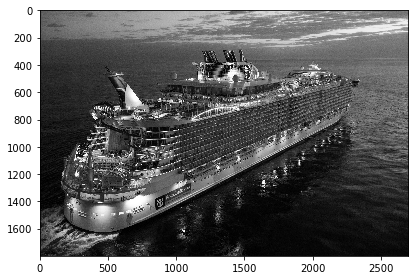

In [90]:
imshow(grey)